In [11]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
############## 1) Accédez au portail API de la NASA et générez votre clé API ############

In [13]:
#### 2) Importez le package de requêtes et stockez votre clé API dans la variable

api_key = 'X5hh2Owdu7zmCF528XbgIdj4K0wOrhlt7I0SrD34'

In [15]:
### 3) Revenez sur le site Web du portail et cliquez sur « Parcourir les API »
print("Déjà fait.")

Déjà fait.


In [7]:
###### 4) Cliquez sur le premier menu déroulant, nommé « APOD » et lisez sa documentation
print("Déjà fait.")

Déjà fait.


In [17]:
## 5) Suivez la documentation fournie pour demander au point de terminaison de l'API l'image astronomique du jour. Obtenez puis affichez l'image sur votre notebook.

url = f'https://api.nasa.gov/planetary/apod?api_key={api_key}'

# Faire la requête à l'API
response = requests.get(url)

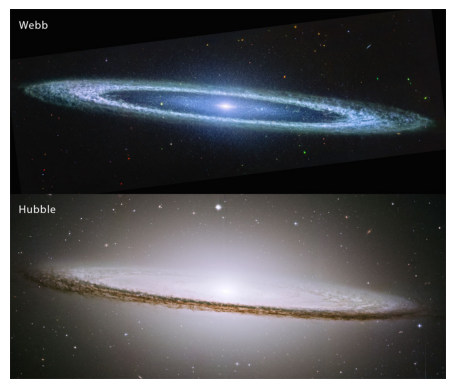

In [19]:
# Vérifier si la requête a réussi
if response.status_code == 200:
    data = response.json()
    image_url = data['url']
    #Télécharger l'image
    image_response = requests.get(image_url)
    img = Image.open(BytesIO(image_response.content))
    # Afficher l'image
    plt.imshow(img)
    plt.axis('off')  
    plt.show()
else:
    print(f"Erreur lors de la requête API : {response.status_code}")

In [21]:
#### 6) Parcourez à nouveau la liste des points de terminaison d'API fournis et sélectionnez l'option « Image astronomique du jour ». Stockez les résultats dans un dataframe pandas

# Créer un DataFrame à partir des données
if 'data' in locals():  
    df = pd.DataFrame([data]) 
    print(df)
else:
    print("Aucune donnée à afficher.")

         date                                        explanation  \
0  2024-11-26  This floating ring is the size of a galaxy.  I...   

                                               hdurl media_type  \
0  https://apod.nasa.gov/apod/image/2411/Sombrero...      image   

  service_version                                     title  \
0              v1  The Sombrero Galaxy from Webb and Hubble   

                                                 url  
0  https://apod.nasa.gov/apod/image/2411/Sombrero...  


In [11]:
### 7) Effectuez les tâches de prétraitement des données nécessaires sur le résultat précédent afin d'obtenir un dataframe propre avec les colonnes suivantes :
#Identification de l'astéroïde
#Nom de l'astéroïde
#Le diamètre minimal estimé en kilomètre
#Magnitude absolue
#Vitesse relative (km/s)

In [23]:
# Créer une liste pour stocker les données
asteroid_list = []


In [25]:
#Parcourir les astéroïdes et extraire les informations nécessaires
for asteroid in asteroid_list:
    asteroid_info = {
        'Identification de l\'astéroïde': asteroid['id'],
        'Nom de l\'astéroïde': asteroid['name'],
        'Diamètre minimal estimé (km)': asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
        'Magnitude absolue': asteroid['absolute_magnitude_h'],
        'Vitesse relative (km/s)': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
    }
    asteroid_list.append(asteroid_info)

In [27]:
# Créer un DataFrame à partir de la liste
df = pd.DataFrame(asteroid_list)

# Afficher le DataFrame propre
print(df)

Empty DataFrame
Columns: []
Index: []


In [29]:
#### 8) Essayez d'exporter le nouveau dataframe dans un fichier CSV et de le partager avec vos collègues

# Exporter le DataFrame dans un fichier CSV
df.to_csv('asteroid_list_data.csv', index=False)

print("Le fichier CSV a été créé avec succès : asteroid_list_data.csv")

Le fichier CSV a été créé avec succès : asteroid_list_data.csv
